In [10]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from imutils import rotate

In [11]:
def horizontal_projection(sobel_img):
    sum_cols = []
    rows, cols = sobel_img.shape
    for row in range(rows-1):
        sum_cols.append(np.sum(sobel_img[row,:]))  
    return sum_cols

In [14]:
def skew_correction(img):
    Gx = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    Gy = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    sobel_img = np.sqrt(Gx * Gx + Gy * Gy)
    sobel_img_inv = 255 - sobel_img
    predicted_angle = 0
    highest_hp = 0
    for index, angle in enumerate(range(-5,5)):
        hp = horizontal_projection(rotate(sobel_img_inv, angle))
        median_hp = np.median(hp)
        if highest_hp < median_hp:
            predicted_angle = angle
            highest_hp = median_hp
    
    rows = img.shape[0]
    cols = img.shape[1]
    img_center = (cols/2, rows/2)
    matrix = cv2.getRotationMatrix2D(img_center, predicted_angle, 1)
    rotate_img = cv2.warpAffine(img, matrix, (cols, rows), borderMode=cv2.BORDER_CONSTANT, borderValue=(255,255,255))
    
    fig, ax = plt.subplots(ncols=2, figsize=(20,10))
    ax[0].set_title('Original grayscale image')
    ax[0].imshow(img, cmap="gray")
    ax[1].set_title('Image rotated by angle = '+str(predicted_angle))
    ax[1].imshow(rotate_img, cmap="gray")
    
    return rotate_img, predicted_angle

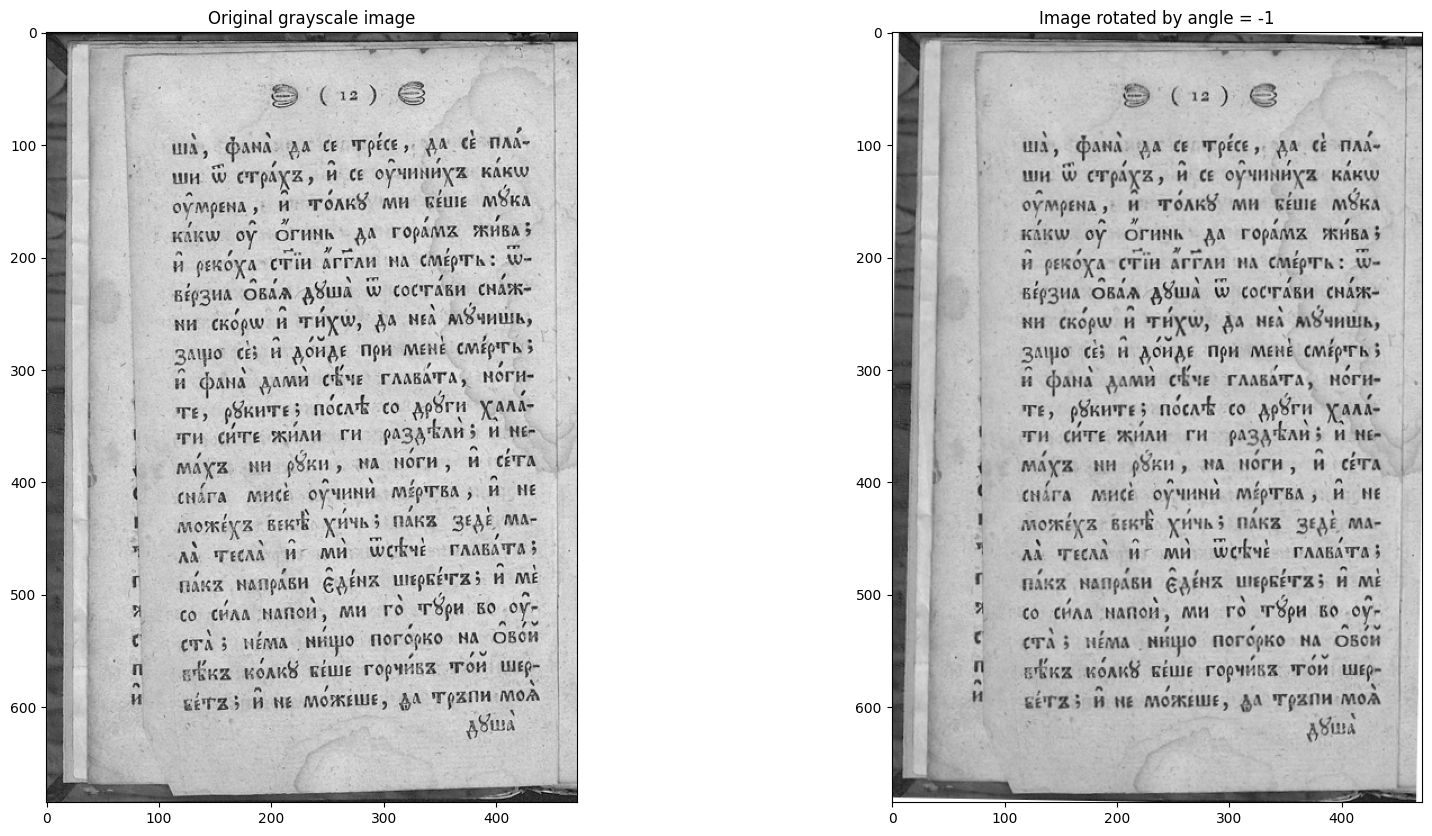

In [15]:
path = 'pages'
for root, dirs, files in os.walk(path):  
    for filename in files:
        img =  cv2.cvtColor(cv2.imread(os.path.join(path, filename)), cv2.COLOR_BGR2GRAY)
        rotate_img, angle = skew_correction(img)
        if angle != 0:
            pass
            cv2.imwrite(os.path.join(path, filename), rotate_img)